# **Лабораторная работа 1**

ИУ5-23М Овчинников Д.А.

# **Цель работы**
Изучение различных методов визуализация данных и создание истории на основе данных

# **Задание**

Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь. Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.
Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:


1.   История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
2.   На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
3. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
4. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
5. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

Сформировать отчет и разместить его в своем репозитории на github. Средства и способы визуализации данных можно посмотреть здесь.

# **Ход работы**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Загрузка датасета
df = pd.read_csv("Tree_Data.csv")
df.head()

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


# Шаг 1. Распределение видов растений (Species)

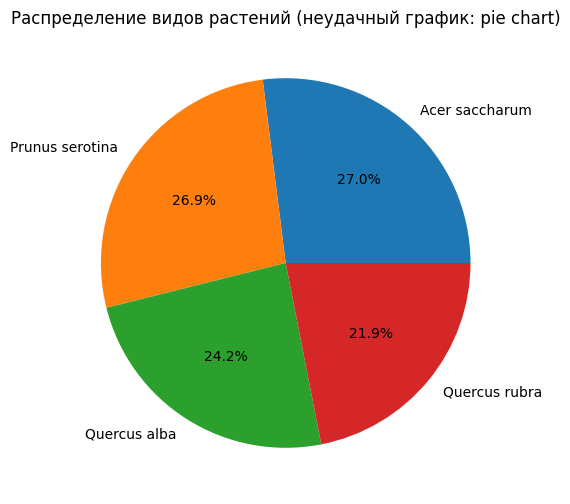

In [3]:
plt.figure(figsize=(12, 6))
df['Species'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Распределение видов растений (неудачный график: pie chart)')
plt.ylabel('')
plt.show()

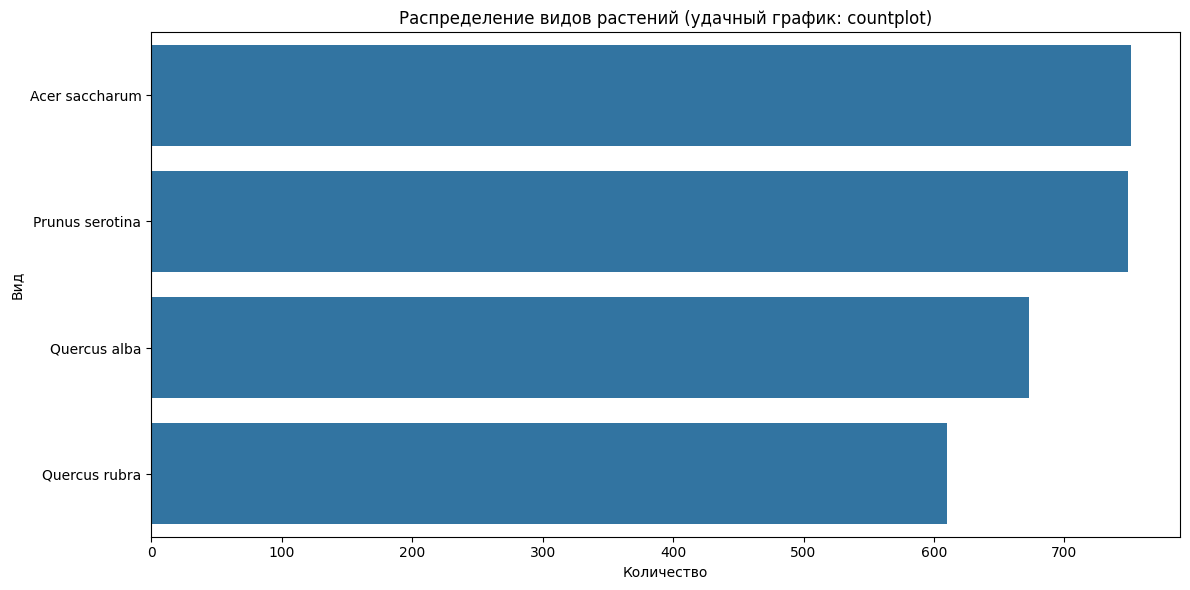

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Species', data=df, order=df['Species'].value_counts().index)
plt.title('Распределение видов растений (удачный график: countplot)')
plt.xlabel('Количество')
plt.ylabel('Вид')
plt.tight_layout()
plt.show()


# Шаг 2. Влияние освещённости (Light_ISF) на количество углеводов (NSC)

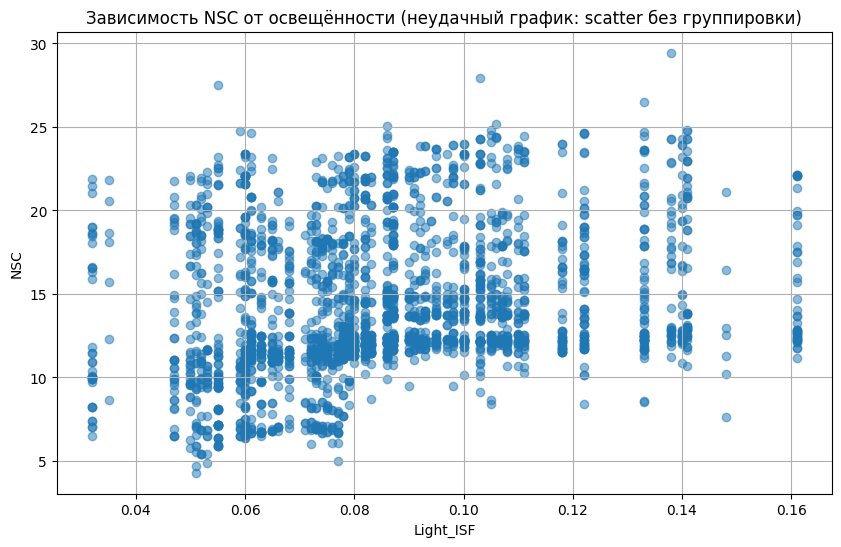

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Light_ISF'], df['NSC'], alpha=0.5)
plt.title('Зависимость NSC от освещённости (неудачный график: scatter без группировки)')
plt.xlabel('Light_ISF')
plt.ylabel('NSC')
plt.grid(True)
plt.show()

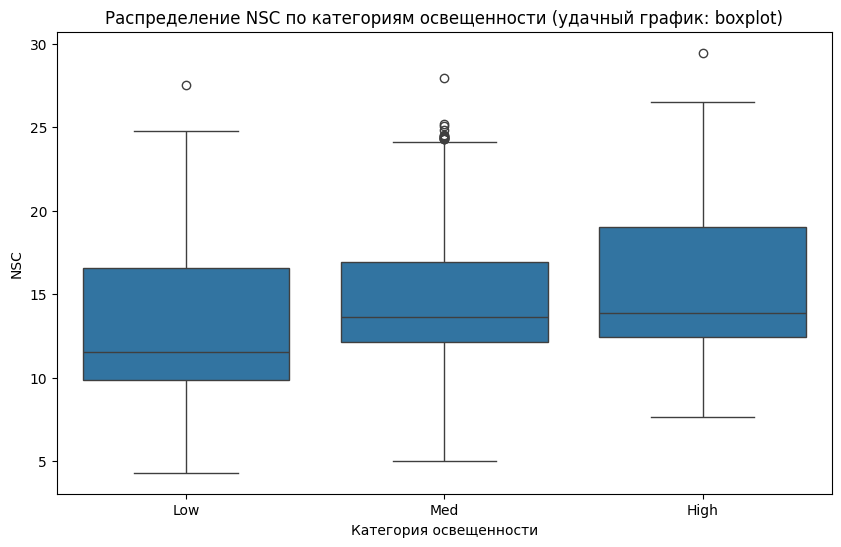

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Light_Cat', y='NSC', data=df, order=['Low', 'Med', 'High'])
plt.title('Распределение NSC по категориям освещенности (удачный график: boxplot)')
plt.xlabel('Категория освещенности')
plt.ylabel('NSC')
plt.show()

# Шаг 3. Грибы (Myco) и типы почвы (SoilMyco)

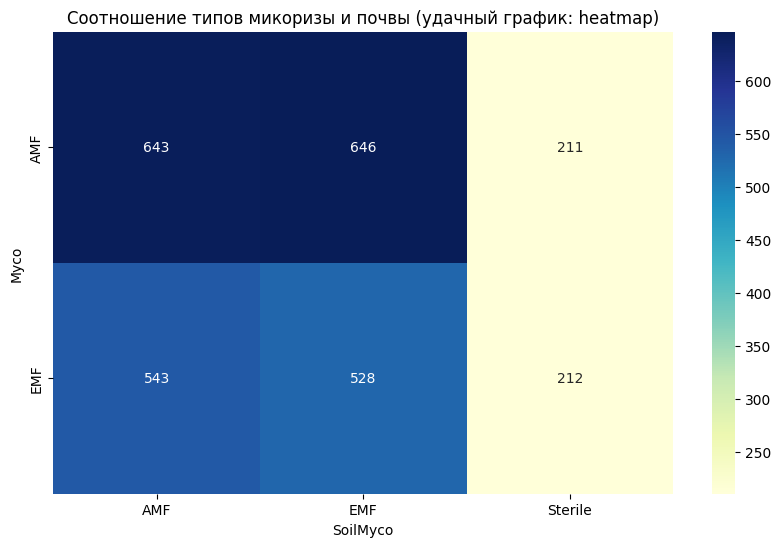

In [7]:
plt.figure(figsize=(10, 6))
crosstab = pd.crosstab(df['Myco'], df['SoilMyco'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Соотношение типов микоризы и почвы (удачный график: heatmap)')
plt.ylabel('Myco')
plt.xlabel('SoilMyco')
plt.show()

# Шаг 4. Распределение фенольных соединений (Phenolics) среди видов

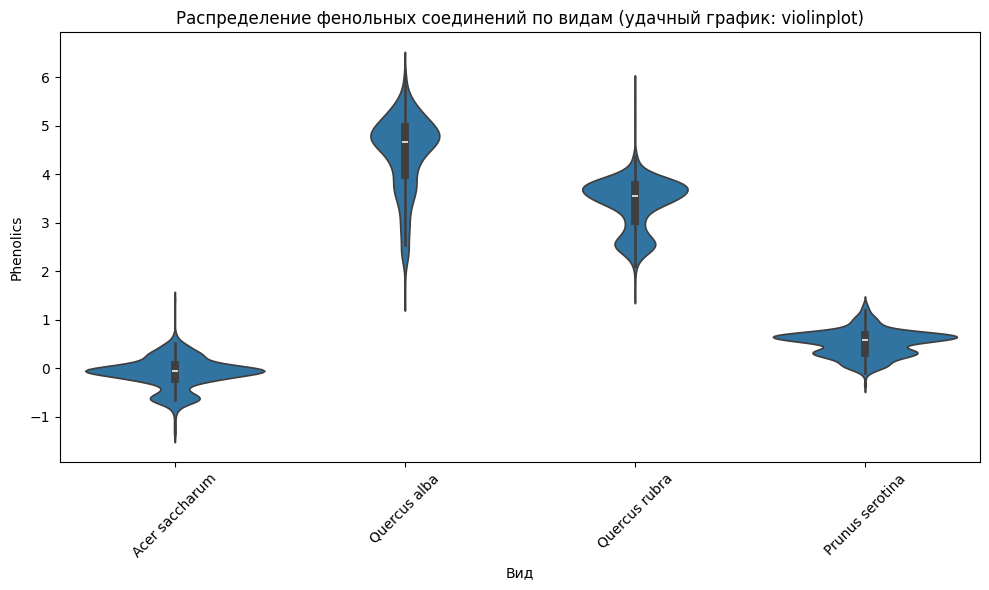

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y='Phenolics', data=df)
plt.title('Распределение фенольных соединений по видам (удачный график: violinplot)')
plt.xlabel('Вид')
plt.ylabel('Phenolics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Шаг 5. Динамика роста: зависимость количества переписей от времени

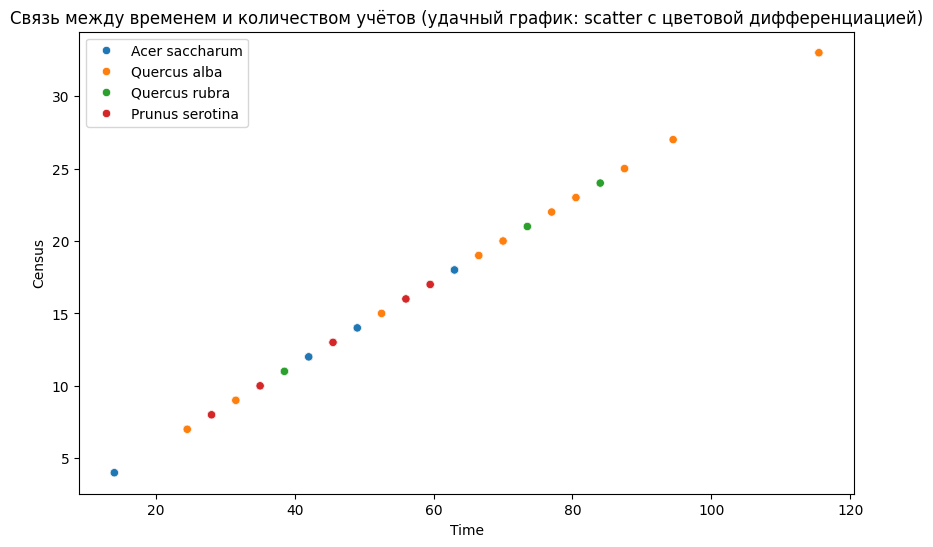

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Census', hue='Species', data=df)
plt.title('Связь между временем и количеством учётов (удачный график: scatter с цветовой дифференциацией)')
plt.xlabel('Time')
plt.ylabel('Census')
plt.legend(loc='best')
plt.show()

# Выводы:
# 1. Наиболее часто встречающиеся виды — Prunus serotina и Acer saccharum.
# 2. Уровень освещения влияет на концентрацию NSC: при высоком освещении разброс увеличивается.
# 3. Типы микоризы часто соответствуют определённым типам почв.
# 4. Фенольные соединения варьируются по видам, что может отражать разные адаптационные стратегии.
# 5. Связь между временем и количеством учётов может указывать на фазу роста или интенсивность наблюдений.